# Task 1 Massive Data Processing

# Crypto Currency Price History

In [78]:
import csv
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('../data/raw/bitcoin/bitcoin_cash_price.csv')

In [80]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",-


In [81]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [82]:
df.count()

Date          45
Open          45
High          45
Low           45
Close         45
Volume        45
Market Cap    45
dtype: int64

In [83]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There are missing data on Market Cap column and we can see the format data is not same. Some of the data do not use number format.

In [84]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 


In [85]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,533207.0,NaN
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,1784640.0,NaN
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,524908.0,NaN
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,190952.0,NaN
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,85013.0,NaN


In [86]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",514.90,550.95,458.78,541.71,338978000.0,8.527100e+09
1,"Sep 04, 2017",608.26,608.26,500.75,517.24,328957000.0,1.007220e+10
2,"Sep 03, 2017",578.27,617.41,563.59,607.43,344862000.0,9.574520e+09
3,"Sep 02, 2017",621.96,642.05,560.58,575.90,350478000.0,1.029700e+10
4,"Sep 01, 2017",588.40,645.52,586.73,622.17,393839000.0,9.740460e+09


In [87]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object

Convert time column into date time format

In [88]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Date          45 non-null datetime64[ns]
Open          45 non-null float64
High          45 non-null float64
Low           45 non-null float64
Close         45 non-null float64
Volume        45 non-null float64
Market Cap    35 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.5 KB


In [90]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    10
dtype: int64

In [91]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,10,0.222222


I try to fill in the missing value by interpolated the data

<function matplotlib.pyplot.show(*args, **kw)>

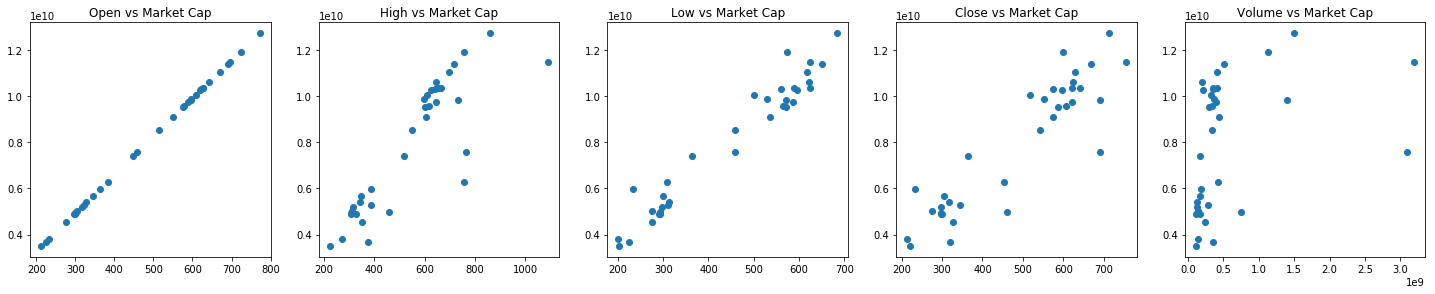

In [92]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Market Cap has linear condition with Open.

In [97]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:35]
Market_Cap = df['Market Cap'].iloc[0:35]

In [98]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.9999801609861945

In [100]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
40,2017-07-27,417.10,460.97,367.78,385.48,533207.0,NaN,6.887863e+09
41,2017-07-26,407.08,486.16,321.79,365.82,1784640.0,NaN,6.721934e+09
42,2017-07-25,441.35,541.66,338.09,406.90,524908.0,NaN,7.289438e+09
43,2017-07-24,412.58,578.89,409.21,440.70,190952.0,NaN,6.813013e+09
44,2017-07-23,555.89,578.97,411.78,413.06,85013.0,NaN,9.186199e+09


Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [102]:
df.count()

Date                  45
Open                  45
High                  45
Low                   45
Close                 45
Volume                45
Market Cap            35
Market Cap Predict    45
dtype: int64